In [137]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

In [138]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/titanic-training-data.csv")

In [139]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [142]:
median1=df["Age"].median()
median1

28.0

In [143]:
df["Age"].replace(np.nan,median1,inplace=True)

In [144]:
mode1=df["Embarked"].mode()

In [145]:
df["Embarked"].fillna(mode1,inplace=True)

In [146]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
mode2=df["Cabin"].mode()
mode2

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [148]:
df["Cabin"].fillna(mode2,inplace=True)

In [149]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [150]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

In [151]:
df=df.drop("Cabin",axis=1)

In [152]:
df=df.dropna()

In [153]:
column=['Name','Fare','Ticket']
df.drop(column,axis=1,inplace=True)
     

In [154]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [155]:
dummies=pd.get_dummies(df[['Sex','Pclass','Embarked','SibSp','Parch']])

In [156]:
columns=['Sex','Pclass','Embarked','SibSp','Parch']

In [157]:
dummies.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,1,0,0,1
1,1,1,0,1,0,1,0,0
2,3,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,1
4,3,0,0,0,1,0,0,1


In [158]:
df=pd.concat([df,dummies],axis=1)

In [159]:
df.drop(columns,axis=1,inplace=True)

In [160]:
df.head()


,PassengerId,Survived,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,0,1,0,0,1
1,2,1,38.0,1,0,1,0,0
2,3,1,26.0,1,0,0,0,1
3,4,1,35.0,1,0,0,0,1
4,5,0,35.0,0,1,0,0,1


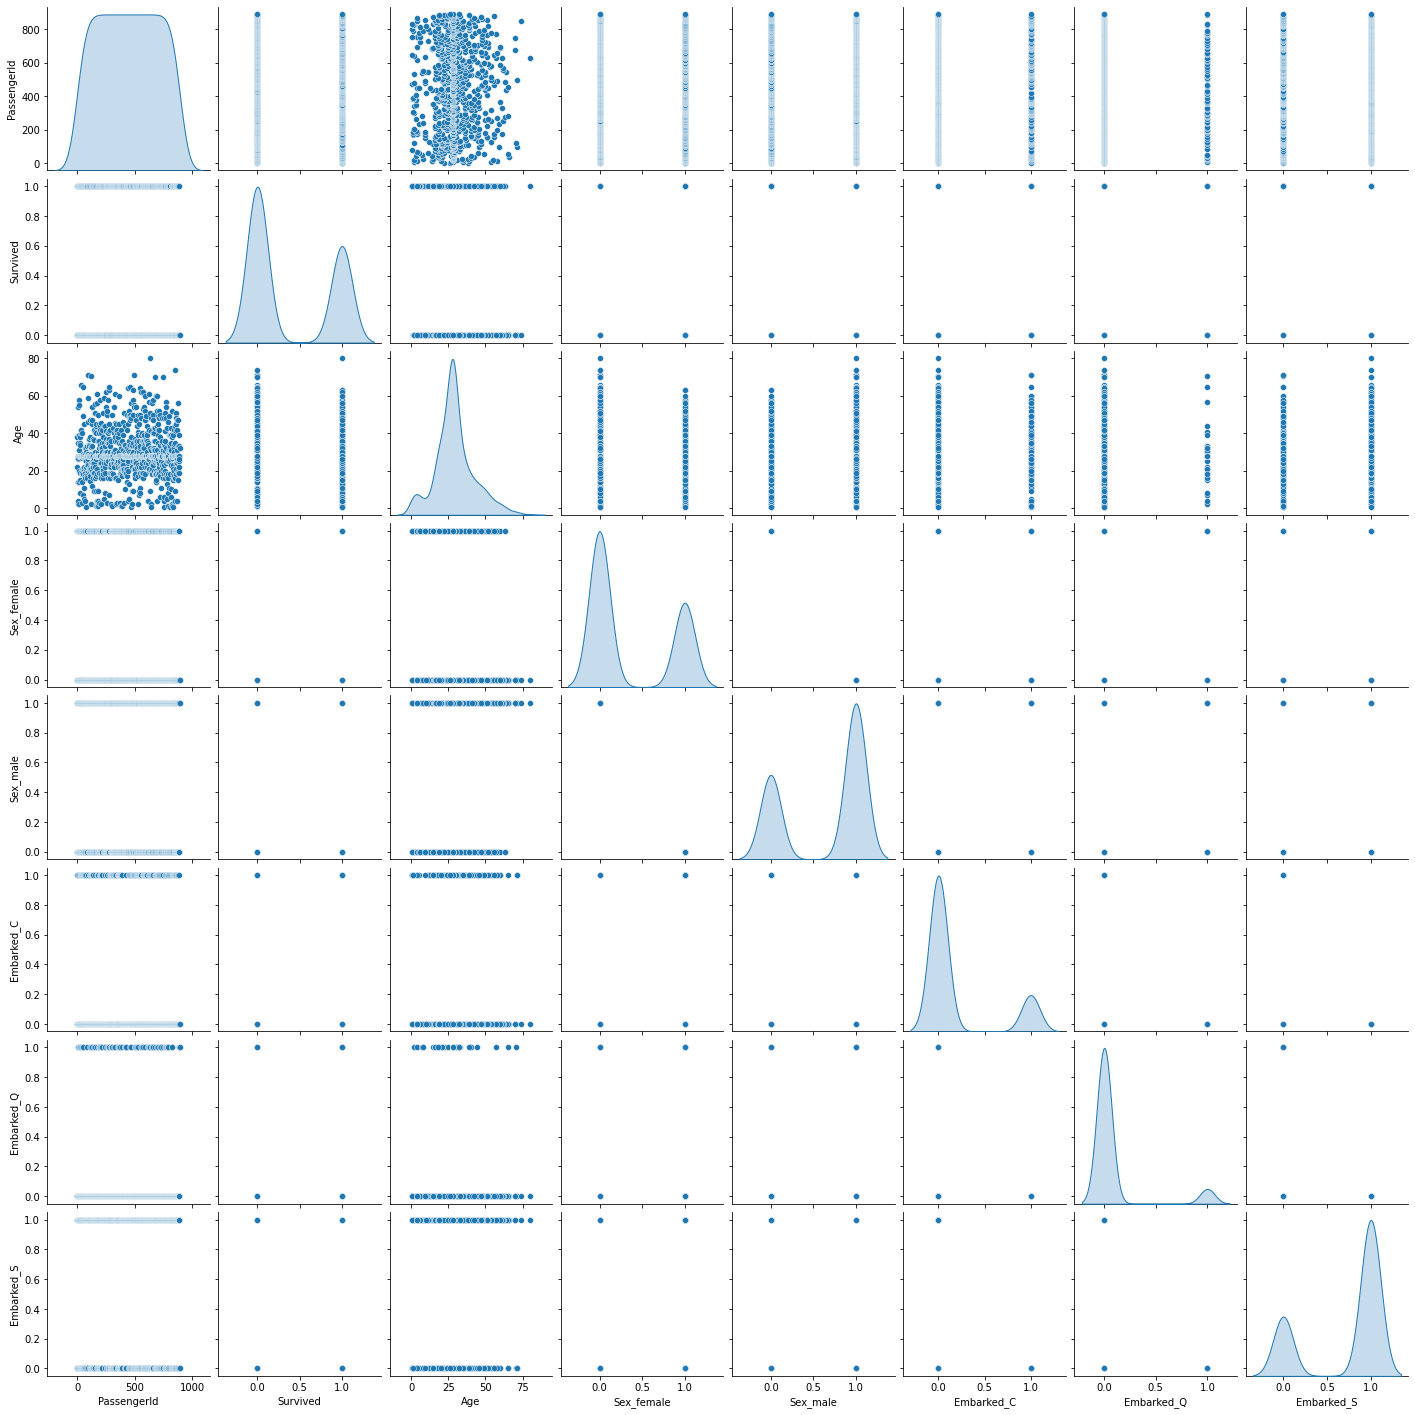

In [161]:
sns.pairplot(df,diag_kind='kde')
x=df.drop(['Survived'],axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [162]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [163]:
model1.score(x_train,y_train)

0.7797427652733119

In [164]:
predictions=model1.predict(x_test)
accuracy_score(y_test,predictions)

0.8014981273408239

In [165]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       162
           1       0.75      0.73      0.74       105

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [166]:
confusion_matrix(y_test,predictions)


array([[137,  25],
       [ 28,  77]])

In [167]:
classification_report(y_test,predictions)


'              precision    recall  f1-score   support\n\n           0       0.83      0.85      0.84       162\n           1       0.75      0.73      0.74       105\n\n    accuracy                           0.80       267\n   macro avg       0.79      0.79      0.79       267\nweighted avg       0.80      0.80      0.80       267\n'

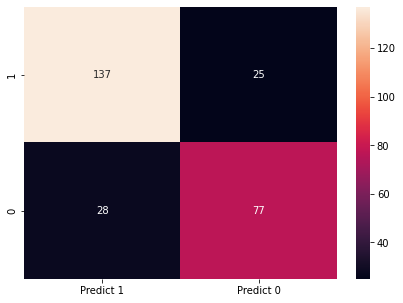

In [168]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in["1","0"]],columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [169]:
model2=SVC()

In [170]:
model2.fit(x_train,y_train)

SVC()

In [171]:
model2.score(x_train,y_train)

0.6221864951768489

In [172]:
model2.score(x_test,y_test)

0.6067415730337079

In [173]:
# the score is not satisfactory so we try different combinations in SVC

In [174]:
model3=SVC(kernel="linear",gamma="auto")

In [ ]:
model3.fit(x_train,y_train)

In [ ]:
model3.score(x_train,y_train)

In [ ]:
model3.score(x_test,y_test)

In [178]:
model4=DecisionTreeClassifier()

In [179]:
model4.fit(x_train,y_train)

DecisionTreeClassifier()

In [180]:
model4.score(x_train,y_train)

1.0

In [181]:
model4.score(x_test,y_test)

0.7528089887640449

In [182]:
# it is showing over train value as 91% is too much but test is only 70%

In [184]:
model5=DecisionTreeClassifier(max_depth=3)

In [185]:
model5.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [187]:
model5.score(x_train,y_train)

0.8127340823970037

In [186]:
model5.score(x_test,y_test)

0.8127340823970037

In [ ]:
# trying SVR

In [ ]:
#model6=SVR()

In [ ]:
#model6.fit(x_train,y_train)

In [ ]:
#model6.score(x_test,y_test)

In [ ]:
# again we can try for different kernel and other options

In [ ]:
# use SVR with numerical data of test and train not catagotrical

In [176]:
# we can try with: from sklearn.tree import DecisionTreeRegressor

In [177]:
# try this score also